In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import defaultdict
from spacy.util import minibatch
from spacy.util import compounding
import spacy
import os
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter
import plotly.figure_factory as ff
import plotly.express as px
from plotly import graph_objs as go
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]


In [5]:
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [6]:
pio.renderers.default = "notebook_connected"


In [7]:
!ls /fp/projects01/ec307/ec-krimhau/jira_datasets/

highest_high_vs_low_lowest_balanced_jira.csv	high_highest_vs_rest
highest_vs_lowest_balanced_jira.csv		high_vs_rest
highest_vs_rest_balanced_jira.csv		jira_clean_with_all_cols.csv
highest_vs_rest_min_len_25th_balanced_jira.csv


In [10]:
file_name = "highest_vs_rest_balanced_jira.csv"
path_name = "/fp/projects01/ec307/ec-krimhau/jira_datasets"
full_name = f"{path_name}/{file_name}"

In [11]:
df = pd.read_csv(full_name, index_col=0)
df

,text_clean,label,class_original
class,,,
highest,when we do range query on simple keys it does ...,1,Highest
highest,unhandledpromiserejectionwarning unhandled pro...,1,Highest
rest,the fabricunittestdaily branch failing intermi...,0,Medium
rest,as a system operator i want to receive alerts ...,0,Medium
rest,there is no support in datasourcetransactionma...,0,Medium
...,...,...,...
rest,once i have imported a widget into the store i...,0,Low
rest,the spec defines an axiom of a ie singleton li...,0,Medium
rest,to have an history on master of all csvs setup...,0,Medium


In [12]:
df = df.rename(columns={'text_clean': 'text'})

In [13]:
# Drop NaN values and reset index of dataframe
df = df[df['text'].notna()]
df = df.reset_index()

In [14]:
df


,class,text,label,class_original
0,highest,when we do range query on simple keys it does ...,1,Highest
1,highest,unhandledpromiserejectionwarning unhandled pro...,1,Highest
2,rest,the fabricunittestdaily branch failing intermi...,0,Medium
3,rest,as a system operator i want to receive alerts ...,0,Medium
4,rest,there is no support in datasourcetransactionma...,0,Medium
...,...,...,...,...
110711,rest,once i have imported a widget into the store i...,0,Low
110712,rest,the spec defines an axiom of a ie singleton li...,0,Medium
110713,rest,to have an history on master of all csvs setup...,0,Medium
110714,highest,there are still some changes expected to be me...,1,Highest


In [ ]:
df["class"].value_counts()

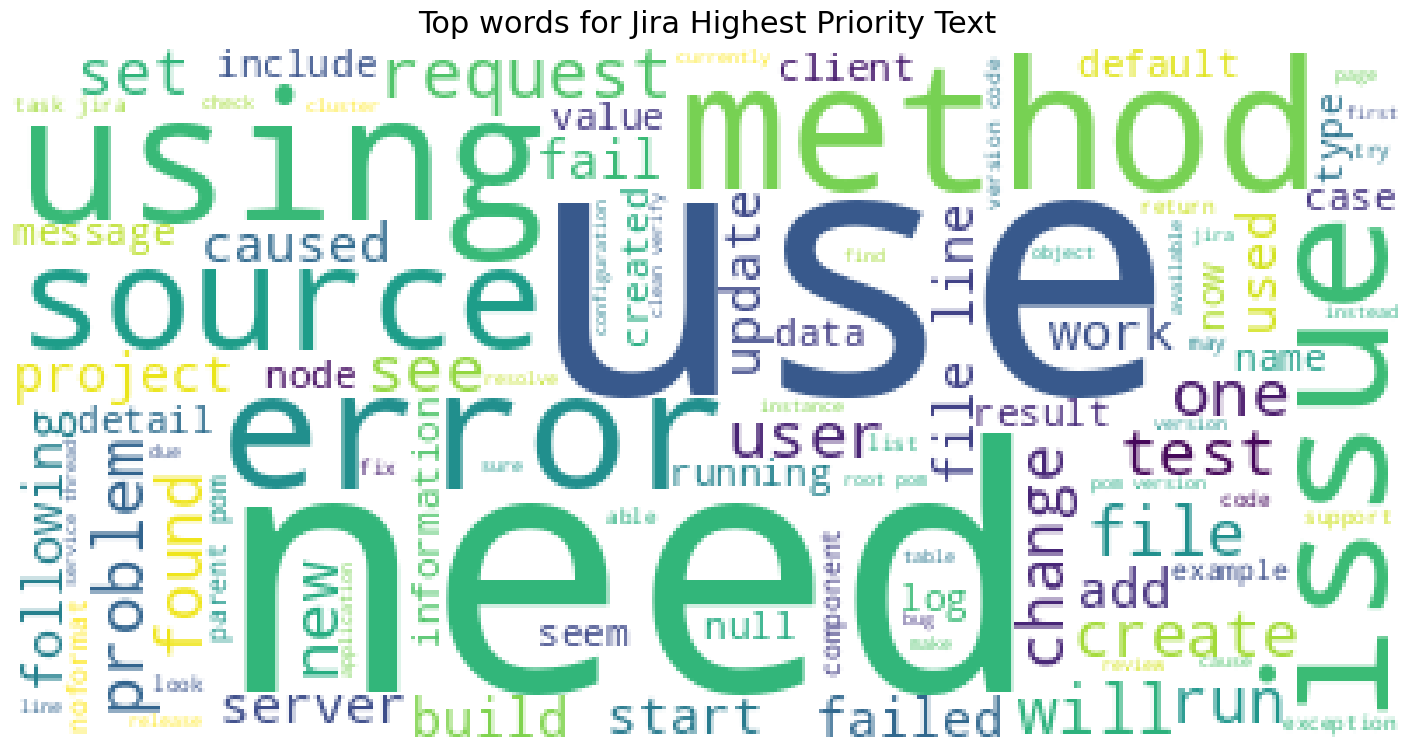

In [15]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['class_original'] == "Highest", 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Highest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()


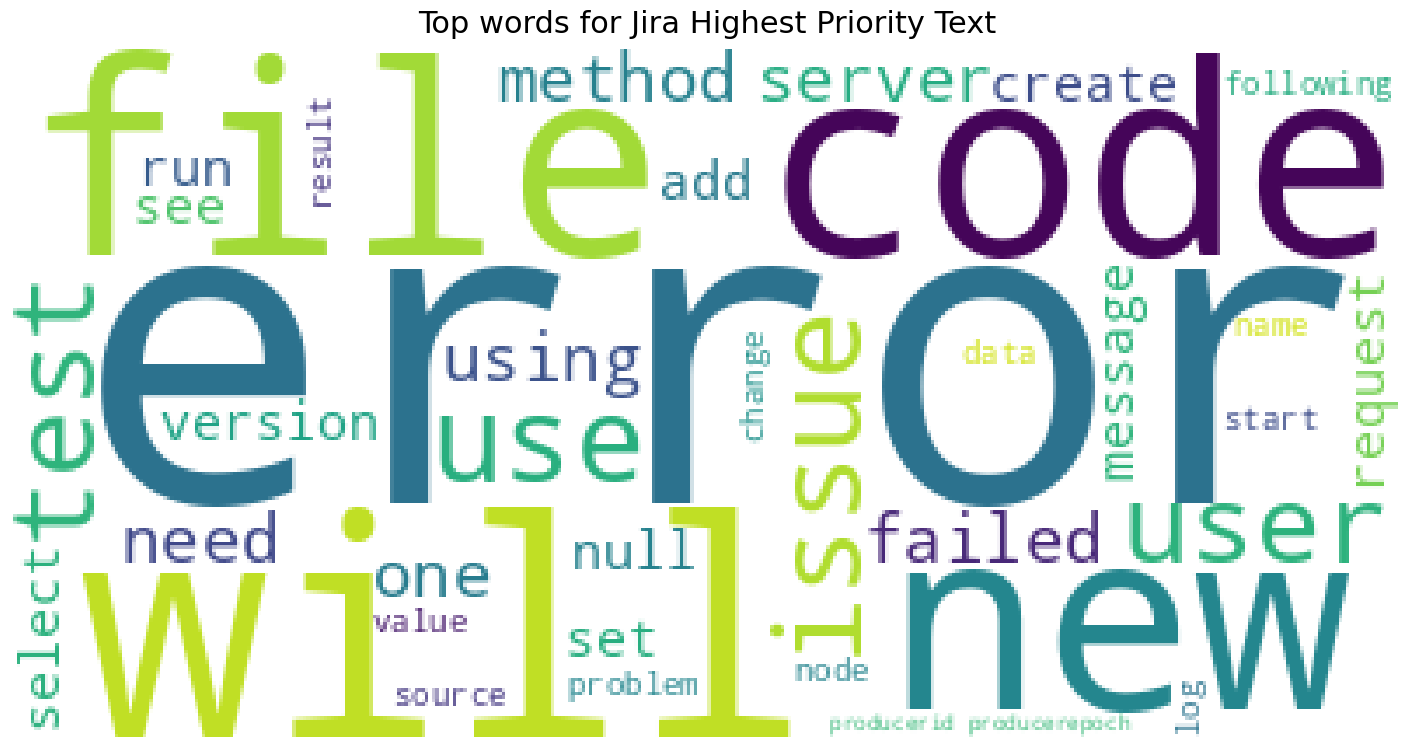

In [16]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['class_original'] == "High", 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Highest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

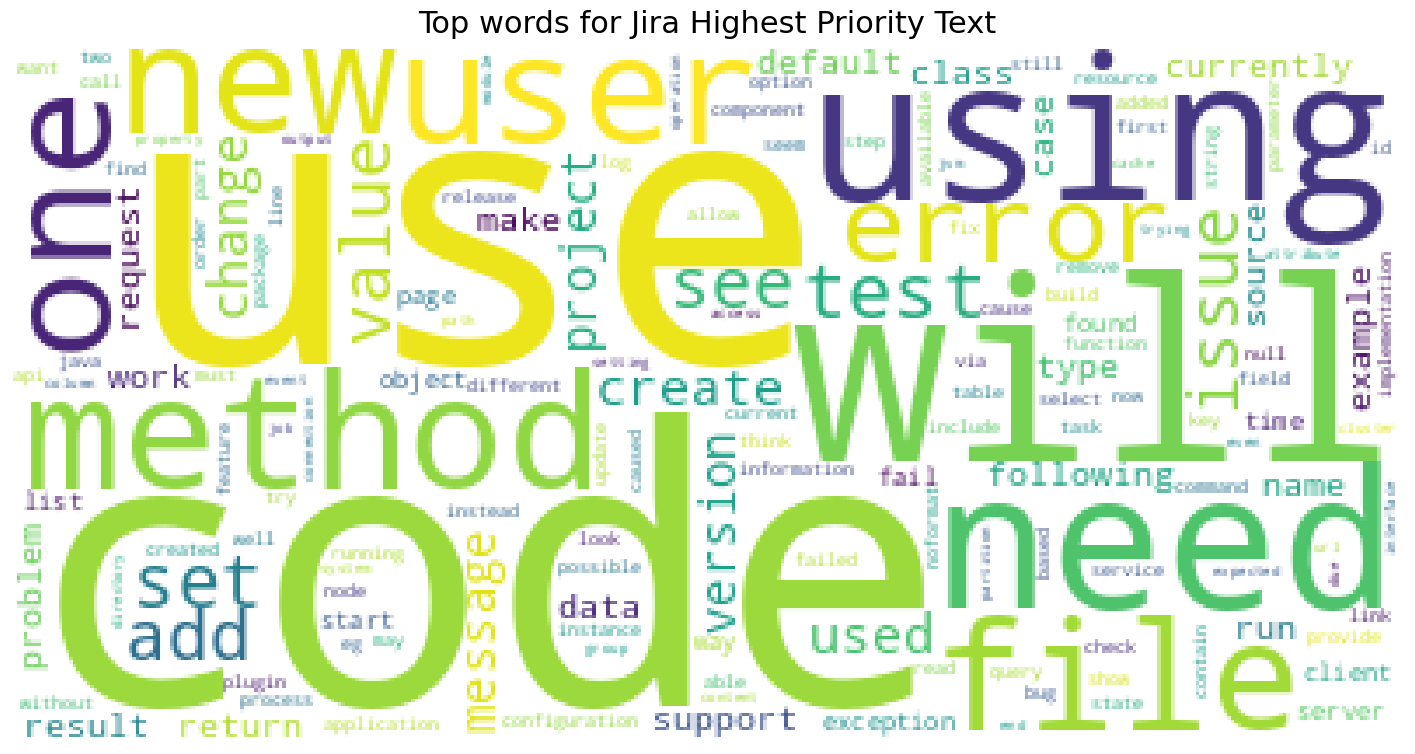

In [17]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['class_original'] == "Medium", 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Highest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

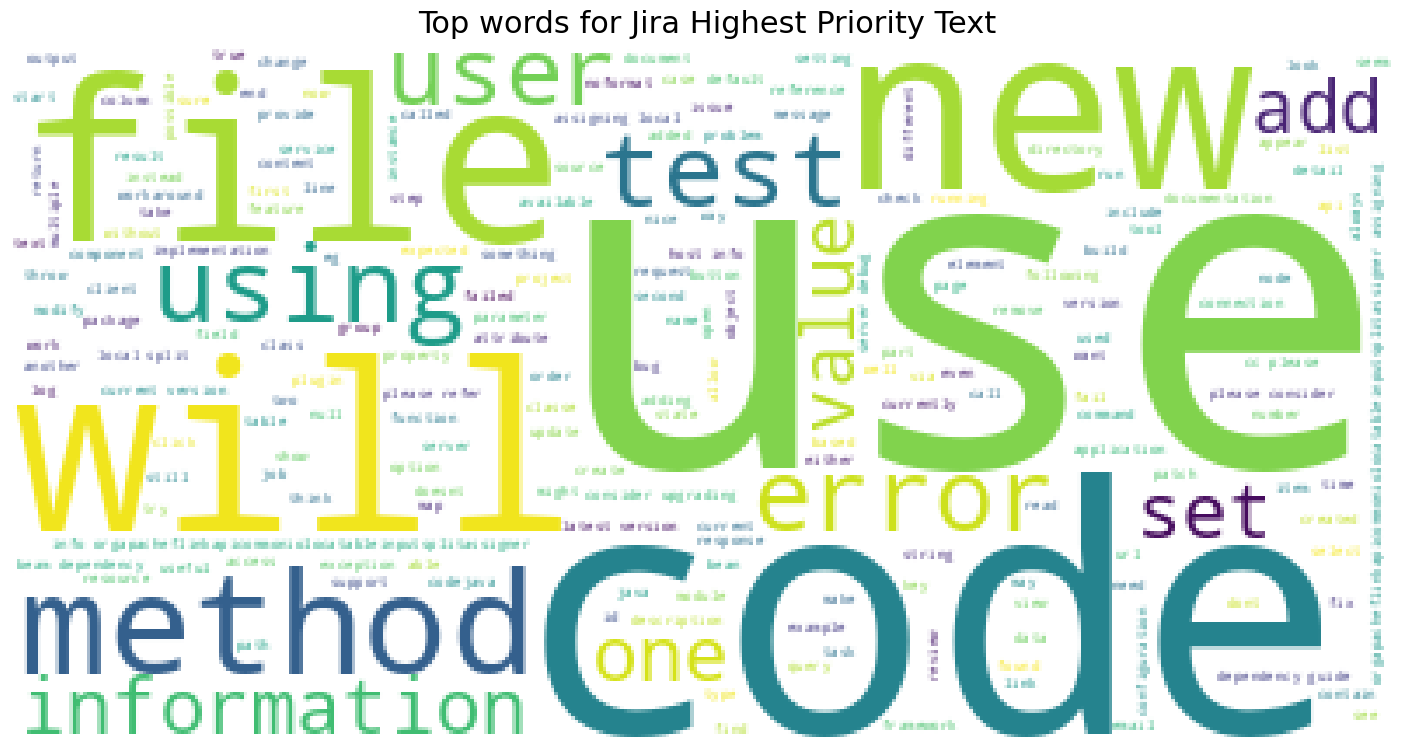

In [18]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['class_original'] == "Low", 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Highest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

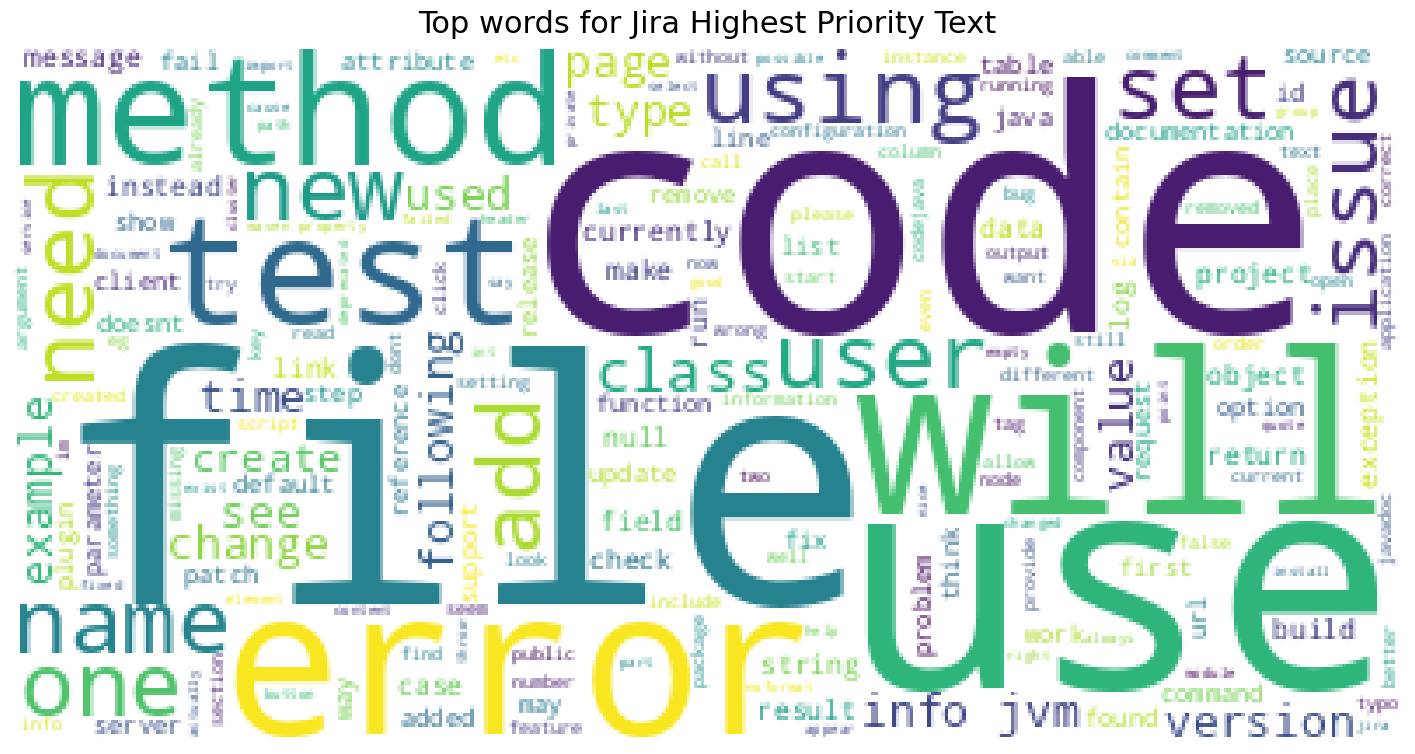

In [19]:
wc = WordCloud(
    background_color='white',
    max_words=200,
)
wc.generate(
    ' '.join(text for text in df.loc[df['class_original'] == "Lowest", 'text']))
plt.figure(figsize=(18, 10))
plt.title('Top words for Jira Highest Priority Text',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [20]:
top_debt_words = wc.generate(
    ' '.join(text for text in df.loc[df['class_original'] == 'Highest', 'text']))


In [21]:
top_debt_words.words_

{'use': 1.0,
 'need': 0.9012865215823013,
 'using': 0.8832511722977034,
 'method': 0.8707466634603823,
 'error': 0.8109895394974149,
 'issue': 0.796320788745942,
 'source': 0.7817722736563665,
 'request': 0.7493086449440904,
 'will': 0.7019357941565468,
 'file': 0.6931585908380425,
 'one': 0.6817362029577972,
 'new': 0.6698328724299627,
 'test': 0.6644222676445833,
 'see': 0.6614163760971504,
 'user': 0.6444631477696284,
 'problem': 0.642419141517374,
 'change': 0.6079115065528435,
 'create': 0.5950462907298305,
 'run': 0.5859083804256342,
 'found': 0.5851869664542503,
 'set': 0.5841048454971745,
 'project': 0.5801370686545629,
 'failed': 0.5452687267043405,
 'build': 0.5428640134663941,
 'used': 0.5191775880726224,
 'following': 0.5012624744499219,
 'fail': 0.49236503546952026,
 'server': 0.4841890104605026,
 'caused': 0.46675483948539137,
 'add': 0.4621858843332933,
 'start': 0.44042322952987856,
 'work': 0.4392208729109054,
 'file line': 0.4389804015871107,
 'update': 0.431044847901

In [22]:
df['text_len'] = df['text'].apply(lambda x: len(x.split(' ')))
df.head()


,class,text,label,class_original,text_len
0,highest,when we do range query on simple keys it does ...,1,Highest,556
1,highest,unhandledpromiserejectionwarning unhandled pro...,1,Highest,26
2,rest,the fabricunittestdaily branch failing intermi...,0,Medium,30
3,rest,as a system operator i want to receive alerts ...,0,Medium,22
4,rest,there is no support in datasourcetransactionma...,0,Medium,13


In [23]:
# Assuming 'text_len' is already calculated as shown previously
description = df['text_len'].describe()

# Applying formatting to make numbers more readable
formatted_description = description.apply(lambda x: f"{x:,.0f}")
print(formatted_description)

count    110,716
mean          84
std          220
min            1
25%           26
50%           51
75%           94
max       27,345
Name: text_len, dtype: object


In [24]:
df['text_len'].describe()

count    110716.000000
mean         83.728919
std         220.480381
min           1.000000
25%          26.000000
50%          51.000000
75%          94.000000
max       27345.000000
Name: text_len, dtype: float64

In [ ]:
balance_counts = df.groupby('class')['class'].agg('count').values
balance_counts


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Non-'],
    y=[balance_counts[0]],
    name='Non-TD',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['TD'],
    y=[balance_counts[1]],
    name='TD',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by label</span>'
)
fig.show()


In [28]:
Non_df = df[df['label'] == 0]['text_len'].value_counts().sort_index()
df1 = df[df['label'] == 1]['text_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=Non_df.index,
    y=Non_df.values,
    name='Rest',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=df1.index,
    y=df1.values,
    name='Highest Priority',
    fill='tozeroy',
    marker_color=primary_grey,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Message length</span>'
)
fig.update_xaxes(range=[0, 300])
fig.show()


In [31]:
from nltk.util import ngrams
from plotly import tools
import plotly.offline as py
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /fp/homes01/u01/ec-
[nltk_data]     krimhau/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
#Gram analysis on Training set- Bigram and Trigram
stopword = set(stopwords.words('english'))


def gram_analysis(data, gram):
    tokens = [t for t in data.lower().split(
        " ") if t != "" if t not in stopword]
    ngrams = zip(*[tokens[i:] for i in range(gram)])
    final_tokens = [" ".join(z) for z in ngrams]
    return final_tokens


#Create frequency grams for analysis

def create_dict(data, grams):
    freq_dict = defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence, grams):
            freq_dict[tokens] += 1
    return freq_dict


def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace


def create_new_df(freq_dict,):
    freq_df = pd.DataFrame(sorted(freq_dict.items(), key=lambda z: z[1])[::-1])
    freq_df.columns = ['n_gram_words', 'n_gram_frequency']
   
    trace = horizontal_bar_chart(freq_df[:20], 'orange')
    return trace


def plot_grams(trace_zero, trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                              subplot_titles=["Frequent words of Non_TD ",
                                              "Frequent words of TD"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900,
                         paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')


In [34]:
df_zero = df[df['label'] == 0]
df_ones= df[df['label'] == 1]

In [35]:
print("Bi-gram analysis")
freq_df_zero=create_dict(df_zero["text"],2)

Bi-gram analysis


In [36]:
trace_zero = create_new_df(freq_df_zero)
freq_df_ones = create_dict(df_ones["text"], 2)
trace_ones = create_new_df(freq_df_ones)


In [38]:
plot_grams(trace_zero, trace_ones)


In [40]:
print("Tri-gram analysis")
freq_df_zero = create_dict(df_zero["text"], 3)
trace_zero=create_new_df(freq_df_zero)
freq_df_ones = create_dict(df_ones["text"], 3)
trace_ones=create_new_df(freq_df_ones)
plot_grams(trace_zero,trace_ones)

Tri-gram analysis
